In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

Using TensorFlow backend.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/RHaile/final_project/master/data/CleanedBorderdata_2008-2018.csv', parse_dates=["Date"])
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitutde,Longitude
0,Van Buren,Maine,108,US-Canada Border,2018-12-01,Trucks,1204,-67.94271,47.16207
1,Maida,North Dakota,3416,US-Canada Border,2018-12-01,Trucks,170,-98.36953,48.98568
2,Douglas,Arizona,2601,US-Mexico Border,2018-12-01,Buses,210,-109.54472,31.34444
3,Presidio,Texas,2403,US-Mexico Border,2018-12-01,Bus Passengers,238,-104.37167,29.56056
4,Anacortes,Washington,3010,US-Canada Border,2018-12-01,Personal Vehicle Passengers,5350,-122.61739,48.49988


In [3]:
# trying 1
df['Month_year'] = df['Date'].dt.to_period('M')
df['Month_year'].values.astype('datetime64[M]')
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitutde,Longitude,Month_year
0,Van Buren,Maine,108,US-Canada Border,2018-12-01,Trucks,1204,-67.94271,47.16207,2018-12
1,Maida,North Dakota,3416,US-Canada Border,2018-12-01,Trucks,170,-98.36953,48.98568,2018-12
2,Douglas,Arizona,2601,US-Mexico Border,2018-12-01,Buses,210,-109.54472,31.34444,2018-12
3,Presidio,Texas,2403,US-Mexico Border,2018-12-01,Bus Passengers,238,-104.37167,29.56056,2018-12
4,Anacortes,Washington,3010,US-Canada Border,2018-12-01,Personal Vehicle Passengers,5350,-122.61739,48.49988,2018-12


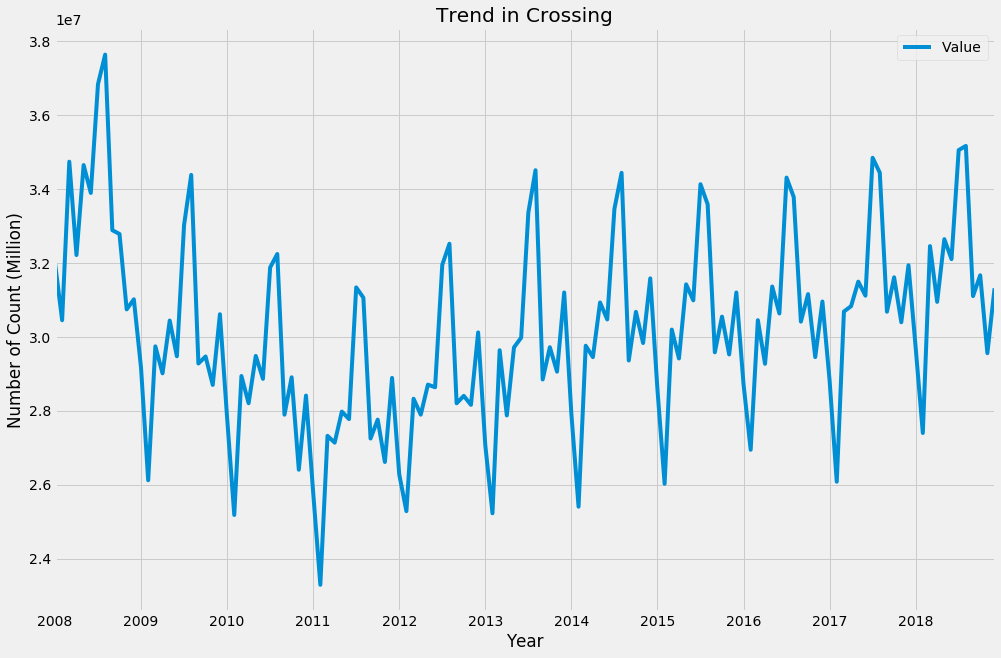

In [28]:
# trying 1

df1 = pd.DataFrame(df, columns = ["Month_year", "Value"])
year_sum = df1.groupby(["Month_year"]).sum()
year_sum.plot(figsize=(15,10))
plt.ylabel("Number of Count (Million)")
plt.xlabel("Year")
plt.title("Trend in Crossing")
plt.show()

In [98]:
data = year_sum.filter(['Value'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

106

In [99]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.60811865],
       [0.49901547],
       [0.79802049],
       [0.62196801],
       [0.79165291],
       [0.73909695],
       [0.94424165],
       [1.        ],
       [0.66882734],
       [0.66168189],
       [0.51944755],
       [0.53847338],
       [0.4095702 ],
       [0.19717454],
       [0.44972416],
       [0.39881836],
       [0.49837524],
       [0.4310476 ],
       [0.67840925],
       [0.77311476],
       [0.41743449],
       [0.43061519],
       [0.37700561],
       [0.5103313 ],
       [0.31544631],
       [0.1316517 ],
       [0.3937612 ],
       [0.34241141],
       [0.43171174],
       [0.38844584],
       [0.59845159],
       [0.6239356 ],
       [0.32086592],
       [0.39139366],
       [0.21702061],
       [0.35689389],
       [0.17427661],
       [0.        ],
       [0.28093483],
       [0.2681469 ],
       [0.32666841],
       [0.31255674],
       [0.56096406],
       [0.54150511],
       [0.27582784],
       [0.31155218],
       [0.23164156],
       [0.390

In [127]:
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(27, len(train_data)):
  x_train.append(train_data[i-27:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 27:
    print(x_train)
    print(y_train)
    print()

[array([0.60811865, 0.49901547, 0.79802049, 0.62196801, 0.79165291,
       0.73909695, 0.94424165, 1.        , 0.66882734, 0.66168189,
       0.51944755, 0.53847338, 0.4095702 , 0.19717454, 0.44972416,
       0.39881836, 0.49837524, 0.4310476 , 0.67840925, 0.77311476,
       0.41743449, 0.43061519, 0.37700561, 0.5103313 , 0.31544631,
       0.1316517 , 0.3937612 ])]
[0.34241141443857614]



In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [129]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(79, 27, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [132]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
79/79 [==============================] - 7s 84ms/step - loss: 0.0382


In [0]:
test_data = scaled_data[training_data_len - 27: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(27, len(test_data)):
  x_test.append(test_data[i-27:i, 0])

In [0]:
x_test = np.array(x_test)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [137]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2880159.724851511

In [138]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [139]:
r2_score(valid['Value'], valid['Predictions'])

-0.8657140983140565

In [140]:
valid

,Value,Predictions
Month_year,,
2016-11,29454332,29263170.0
2016-12,30958929,29271580.0
2017-01,28826910,29279872.0
2017-02,26081678,29238024.0
2017-03,30687520,29106966.0
2017-04,30833570,29026142.0
2017-05,31496810,28981712.0
2017-06,31116972,28978006.0
2017-07,34848911,28991764.0
